# Life Expectancy and GDP

## Project Goals

Our primary goal of this project is to examine data from the World Health Organization and the World Bank to identify relationships between Gross Domestic Product (GDP) and life expectancy of six countries.
To accomplish this, we will utilize data visualization and hypothesis testing to answer the following questions:
* Do life expectancy and GDP have a significant relationship? (p=0.05)
* What sort of graphs and visualizations can we create to examine this relationship?
* Do certain countries have a stronger relationship between GDP and life expectancy than other countries?

## Import Necessary Modules

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

## Initial Data Observation

We'll proceed by importing our data from 'all_data.csv' and examining the first five rows along with some other information to see the nature of the data we'll be working with.

In [8]:
df = pd.read_csv('all_data.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.dtypes)

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
              Year  Life expectancy at birth (years)           GDP
co

All appears to be in order as far as datatypes and null entries are concerned.
Here are some important observations from the initial examination:
* All data falls within the 15 year span from 2000 to 2015.
* Life expectancy falls within the range of 44 years to 81 years.
* GDP falls in the range of 4.41e09 and 1.81e13. It may be worthwhile to scale down the GDP column for clarity.

## Data Wrangling

The column names and number scale are a bit unwieldy. We'll adjust that here.

In [18]:
df.rename(columns={"Life expectancy at birth (years)": "Life Expectancy"}, inplace=True)
#print(df.head())

## Plotting Relationships With Seaborn

First we'll create a scatterplot with a regression line to see the relationship (if it exists) between overall GDP and life expectancy.

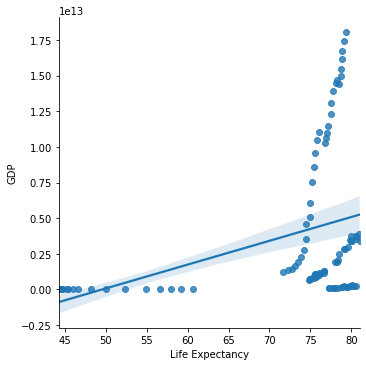

In [20]:
ax = sns.lmplot(data=df, x='Life Expectancy', y='GDP')
plt.show()

There appears to be a positive relationship between life expectancy and GDP. However, many data points are several orders of magnitude lower than the higher GDP values. Let's restrict GDP to all points lower than the median and take a look at the relationship for the lower half of the GDP observations.

<Figure size 432x288 with 0 Axes>

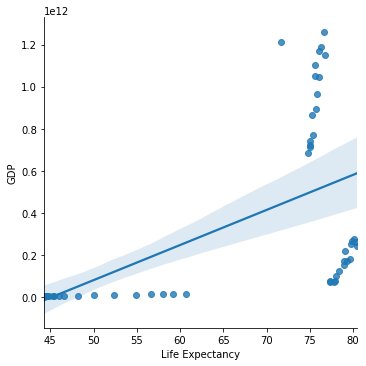

In [27]:
plt.clf()
df_lower = df[df.GDP <= 1.28e12]
ax = sns.lmplot(data=df_lower, x='Life Expectancy', y='GDP')
plt.show()

This subset appears to show a much weaker correlation between GDP and life expectancy. Let's look at the upper half of the data.

<Figure size 432x288 with 0 Axes>

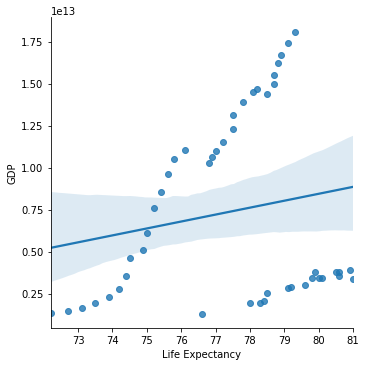

In [28]:
plt.clf()
df_upper = df[df.GDP >= 1.28e12]
ax = sns.lmplot(data=df_upper, x='Life Expectancy', y='GDP')
plt.show()

Again, the data appears to have very little correlation between the two variables. It seems that there is a weak positive relationship between these two variables in general. Perhaps we can draw greater insight by plotting this relationship for each country.

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Text(0.5, 1.0, 'Zimbabwe')

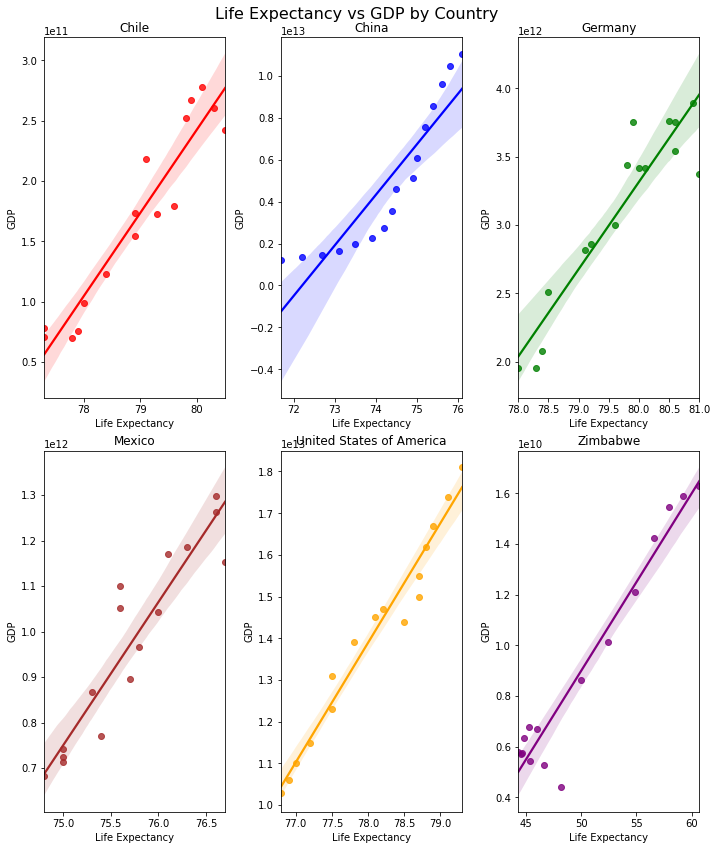

In [60]:
def df_country(country):
    return df[df.Country == country]
print(pd.unique(df.Country))
fig, axs = plt.subplots(2, 3, figsize=(10,12))
sns.regplot(ax= axs[0,0], data=df_country('Chile'), x='Life Expectancy', y='GDP', color='red')
sns.regplot(ax=axs[0,1], data=df_country('China'), x='Life Expectancy', y='GDP', color='blue')
sns.regplot(ax=axs[0,2], data=df_country('Germany'), x='Life Expectancy', y='GDP', color='green')
sns.regplot(ax=axs[1,0], data=df_country('Mexico'), x='Life Expectancy', y='GDP', color='brown')
sns.regplot(ax=axs[1,1], data=df_country('United States of America'), x='Life Expectancy', y='GDP', color='orange')
sns.regplot(ax=axs[1,2], data=df_country('Zimbabwe'), x='Life Expectancy', y='GDP', color='purple')
fig.suptitle('Life Expectancy vs GDP by Country', fontsize = 16)
fig.tight_layout()
axs[0,0].set_title('Chile')
axs[0,1].set_title('China')
axs[0,2].set_title('Germany')
axs[1,0].set_title('Mexico')
axs[1,1].set_title('United States of America')
axs[1,2].set_title('Zimbabwe')

It is much clearer here that there is a strong positive correlation between life expectancy and GDP. Each country appears to have its own range of life expectancies. This muddles the data when it is seen as a whole. This figure will be saved with the project.

In [64]:
#plt.savefig('gdp_by_country.png')

## Analysis with Pearson Coefficient

In this section we will calculate the Pearson r coefficient and p values for each country and examine the significance of the relationship between life expectancy and GDP

In [67]:
countries = pd.unique(df.Country)
for country in countries:
    df_i = df_country(country)
    r, p = pearsonr(df_i['Life Expectancy'], df_i['GDP'])
    print(country + ": ")
    print("r = " + str(r))
    print("p = " + str(p))

Chile: 
r = 0.9498766659254412
p = 1.865913974658645e-08
China: 
r = 0.9085255408648357
p = 1.1250985720700735e-06
Germany: 
r = 0.932698898256127
p = 1.401881553404576e-07
Mexico: 
r = 0.932237716784708
p = 1.468696024830531e-07
United States of America: 
r = 0.9817092382430257
p = 1.7499709269099464e-11
Zimbabwe: 
r = 0.9661998955858778
p = 1.2358516366845913e-09


Using a p-value of 0.05, we can conclude that there is a significant relationship between GDP and life expectancy for each country. Observing the r values leads us to conclude that the United States has the strongest relationship between the two variables in the data sampled, while China has the weakest.

## Conclusions and Insights

Readdressing the question of "Do life expectancy and GDP have a significant relationship," we are confident that the data shows that GDP and life expectancy are significantly correlated across all countries in the data set. The earlier analysis of overall GDP vs life expectancy (as well as observation of the figure of all countries) shows that each country falls into its own subset defined by specific ranges of GDP and life expectancy, indicating that there are other factors that can wildly affect both variables that aren't defined here in this data.